# BANK LOAN ANALYSIS REPORT


## Import Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

In [37]:
df = pd.read_csv("C:/Users/User/Downloads/financial_loan.csv", parse_dates=['issue_date'],   
    dayfirst=True          
)

In [28]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


## Metadata of data

In [29]:
print("No of Rows:", df.shape[0])

No of Rows: 38576


In [30]:
print("No of Columns:", df.shape[1])

No of Columns: 24


In [31]:
df.info

<bound method DataFrame.info of             id address_state application_type emp_length  \
0      1077430            GA       INDIVIDUAL   < 1 year   
1      1072053            CA       INDIVIDUAL    9 years   
2      1069243            CA       INDIVIDUAL    4 years   
3      1041756            TX       INDIVIDUAL   < 1 year   
4      1068350            IL       INDIVIDUAL  10+ years   
...        ...           ...              ...        ...   
38571   803452            NJ       INDIVIDUAL   < 1 year   
38572   970377            NY       INDIVIDUAL    8 years   
38573   875376            CA       INDIVIDUAL    5 years   
38574   972997            NY       INDIVIDUAL    5 years   
38575   682952            NY       INDIVIDUAL    4 years   

                             emp_title grade home_ownership  issue_date  \
0                                Ryder     C           RENT  11-02-2021   
1                       MKC Accounting     E           RENT  01-01-2021   
2                Chema

## Data Types

In [32]:
df.dtypes

id                         int64
address_state             object
application_type          object
emp_length                object
emp_title                 object
grade                     object
home_ownership            object
issue_date                object
last_credit_pull_date     object
last_payment_date         object
loan_status               object
next_payment_date         object
member_id                  int64
purpose                   object
sub_grade                 object
term                      object
verification_status       object
annual_income            float64
dti                      float64
installment              float64
int_rate                 float64
loan_amount                int64
total_acc                  int64
total_payment              int64
dtype: object

In [33]:
df.describe()

,id,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
std,2.113246e+05,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777
min,5.473400e+04,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000


## Total Loan Applications

In [34]:
total_loan_application = df['id'].count()
print("Total Loan Applications:", total_loan_application)

Total Loan Applications: 38576


## MTD Total Loan Applications

In [38]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & 
              (df['issue_date'].dt.month == latest_month)]

mtd_loan_applications = mtd_data['id'].count()

print(f"MTD Loan Applications (for {latest_issue_date.strftime('%B %Y')}): {mtd_loan_applications}")


MTD Loan Applications (for December 2021): 4314


## Total Funded Amount

In [39]:
total_funded_amount = df['loan_amount'].sum()
total_funded_amount_millions = total_funded_amount/ 1000000
print("Total Funded Amount: ${:.2f}M". format(total_funded_amount_millions))

Total Funded Amount: $435.76M


## MTD - Total Funded Amount

In [40]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & 
              (df['issue_date'].dt.month == latest_month)]

mtd_total_funded_amount = mtd_data['loan_amount'].sum()
mtd_total_funded_amount_millions = mtd_total_funded_amount/ 1000000
print("MTD Total Funded Amount: ${:.2f}M". format(mtd_total_funded_amount_millions))

MTD Total Funded Amount: $53.98M


## Total Amount Received

In [41]:
total_amount_received = df['total_payment'].sum()
total_amount_received_millions = total_funded_amount/ 1000000
print("Total Amount Received: ${:.2f}M". format(total_amount_received_millions))

Total Amount Received: $435.76M


## MTD Total Amount Received

In [42]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & 
              (df['issue_date'].dt.month == latest_month)]

mtd_total_amount_received = mtd_data['total_payment'].sum()
mtd_total_amount_received_millions = mtd_total_amount_received/ 1000000
print("MTD Total Amount received: ${:.2f}M". format(mtd_total_amount_received_millions))

MTD Total Amount received: $58.07M


## Average Interest Rate

In [43]:
average_interest_rate = df['int_rate'].mean()*100
print("Avg Int Rate:{:.2f}%".format(average_interest_rate))

Avg Int Rate:12.05%


## Average Debt-to-Income Ratio (DTI)

In [45]:
average_dti = df['dti'].mean()*100
print("Avg DTI:{:.2f}%".format(average_dti))

Avg DTI:13.33%


## Good Loan Metrics

In [46]:

good_loans = df[df['loan_status'].isin(["Fully Paid", "Current"])]

total_loan_applications = df['id'].count()

good_loan_applications = good_loans['id'].count()
good_loan_funded_amount = good_loans['loan_amount'].sum()
good_loan_received = good_loans['total_payment'].sum()

good_loan_funded_amount_millions = good_loan_funded_amount / 1_000_000
good_loan_received_millions = good_loan_received / 1_000_000

good_loan_percentage = (good_loan_applications / total_loan_applications) * 100

print("Good Loan Applications:", good_loan_applications)
print("Good Loan Funded Amount (in Millions): ${:.2f}M".format(good_loan_funded_amount_millions))
print("Good Loan Total Received (in Millions): ${:.2f}M".format(good_loan_received_millions))
print("Percentage of Good Loan Applications: {:.2f}%".format(good_loan_percentage))


Good Loan Applications: 33243
Good Loan Funded Amount (in Millions): $370.22M
Good Loan Total Received (in Millions): $435.79M
Percentage of Good Loan Applications: 86.18%


## Bad Loan Metrics

In [47]:
bad_loans = df[df['loan_status'] == "Charged Off"]

total_loan_applications = df['id'].count()

bad_loan_applications = bad_loans['id'].count()
bad_loan_funded_amount = bad_loans['loan_amount'].sum()
bad_loan_received = bad_loans['total_payment'].sum()

bad_loan_funded_amount_millions = bad_loan_funded_amount / 1_000_000
bad_loan_received_millions = bad_loan_received / 1_000_000

bad_loan_percentage = (bad_loan_applications / total_loan_applications) * 100

print("Bad Loan Applications:", bad_loan_applications)
print("Bad Loan Funded Amount (in Millions): ${:.2f}M".format(bad_loan_funded_amount_millions))
print("Bad Loan Total Received (in Millions): ${:.2f}M".format(bad_loan_received_millions))
print("Percentage of Bad Loan Applications: {:.2f}%".format(bad_loan_percentage))


Bad Loan Applications: 5333
Bad Loan Funded Amount (in Millions): $65.53M
Bad Loan Total Received (in Millions): $37.28M
Percentage of Bad Loan Applications: 13.82%


## CHARTS

## Monthly Trends by Issue Date for Total Funded Amount

In [49]:
# Create monthly_funded dataframe
monthly_funded = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name', sort=False)['loan_amount']
      .sum()
      .div(1_000_000)  # convert to millions
      .reset_index(name='loan_amount_millions')
)


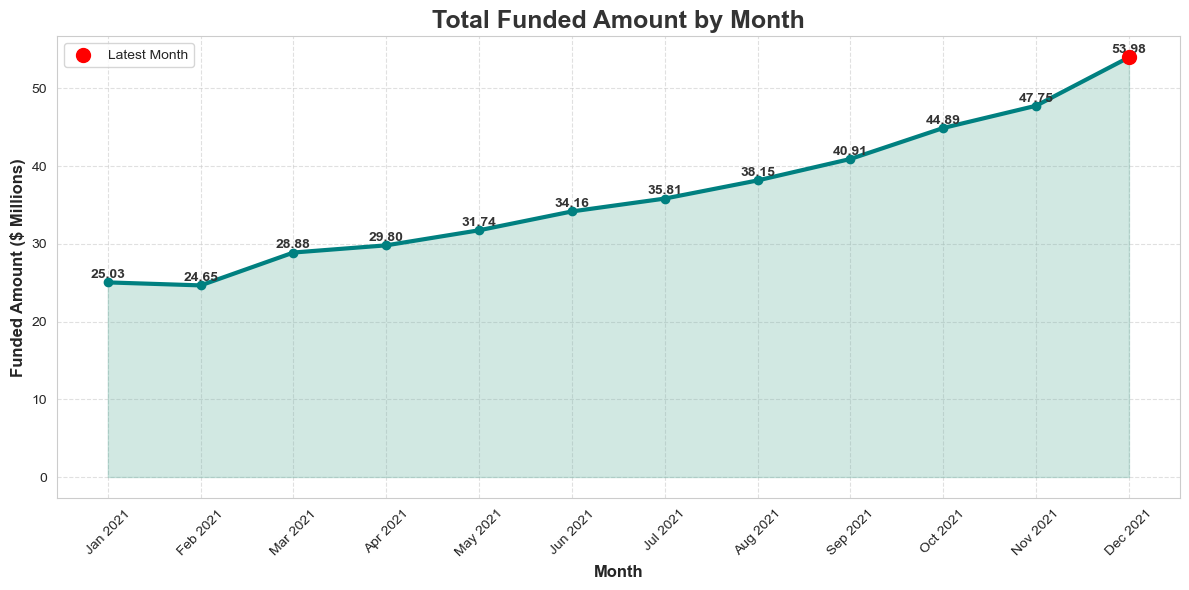

In [50]:
#nice style
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))

# Fill between for soft area effect
plt.fill_between(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], 
                 color='#69b3a2', alpha=0.3)

# Line plot
plt.plot(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], 
         color='#008080', linewidth=3, marker='o', markersize=6)

# Annotate values
for i, row in monthly_funded.iterrows():
    plt.text(i, row['loan_amount_millions'] + 0.15, f"{row['loan_amount_millions']:.2f}", 
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='#333333')

# Highlight last point
plt.scatter(len(monthly_funded)-1, monthly_funded['loan_amount_millions'].iloc[-1], 
            color='red', s=100, zorder=5, label="Latest Month")

# Titles and labels
plt.title('Total Funded Amount by Month', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Funded Amount ($ Millions)', fontsize=12, fontweight='bold')

# X-axis labels
plt.xticks(ticks=range(len(monthly_funded)), labels=monthly_funded['month_name'], rotation=45, fontsize=10)

# Grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()



## Monthly Trends by Issue Date for Total Amount Received

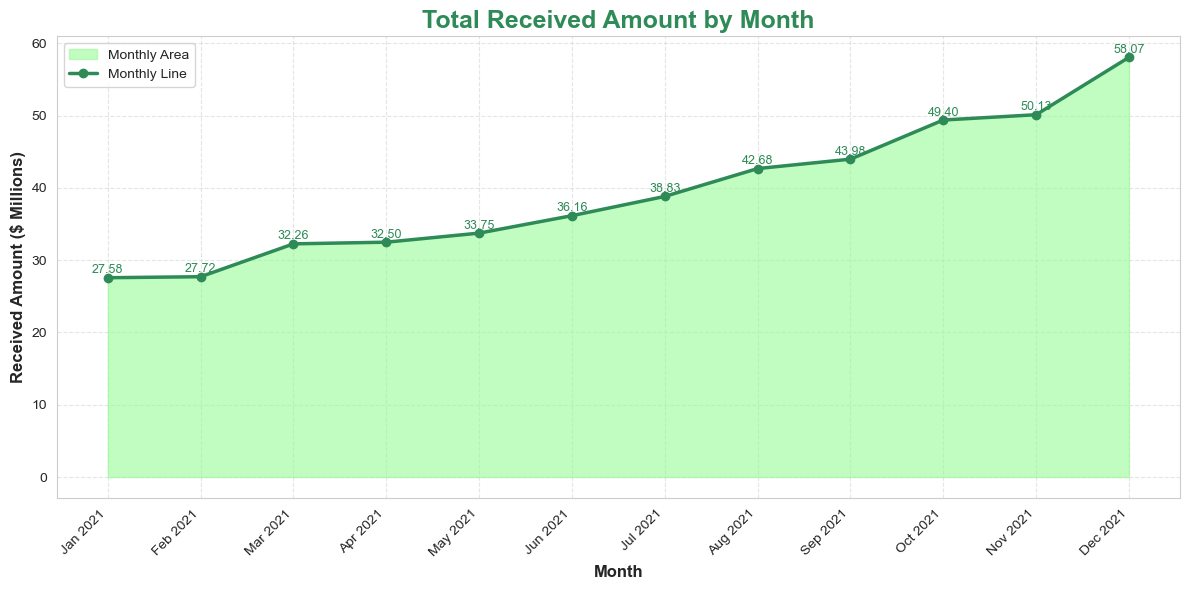

In [51]:
monthly_received = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name', sort=False)['total_payment']
      .sum()
      .div(1_000_000)
      .reset_index(name='received_amount_millions')
)

# Create a bigger, nicer chart
plt.figure(figsize=(12, 6))
plt.fill_between(
    monthly_received['month_name'], 
    monthly_received['received_amount_millions'], 
    color='#98FB98', alpha=0.6, label='Monthly Area'
)
plt.plot(
    monthly_received['month_name'], 
    monthly_received['received_amount_millions'], 
    color='#2E8B57', linewidth=2.5, marker='o', markersize=6, label='Monthly Line'
)

# Add data labels
for i, row in monthly_received.iterrows():
    plt.text(i, row['received_amount_millions'] + 0.2, 
             f"{row['received_amount_millions']:.2f}",
             ha='center', va='bottom', fontsize=9, color='#2E8B57')

# Title & labels
plt.title('Total Received Amount by Month', fontsize=18, fontweight='bold', color='#2E8B57')
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Received Amount ($ Millions)', fontsize=12, fontweight='bold')

# Format x-axis
plt.xticks(
    ticks=range(len(monthly_received)), 
    labels=monthly_received['month_name'], 
    rotation=45, ha='right', fontsize=10
)

# Grid & legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()



## Monthly Trends by Issue Date for Total Loan Applications


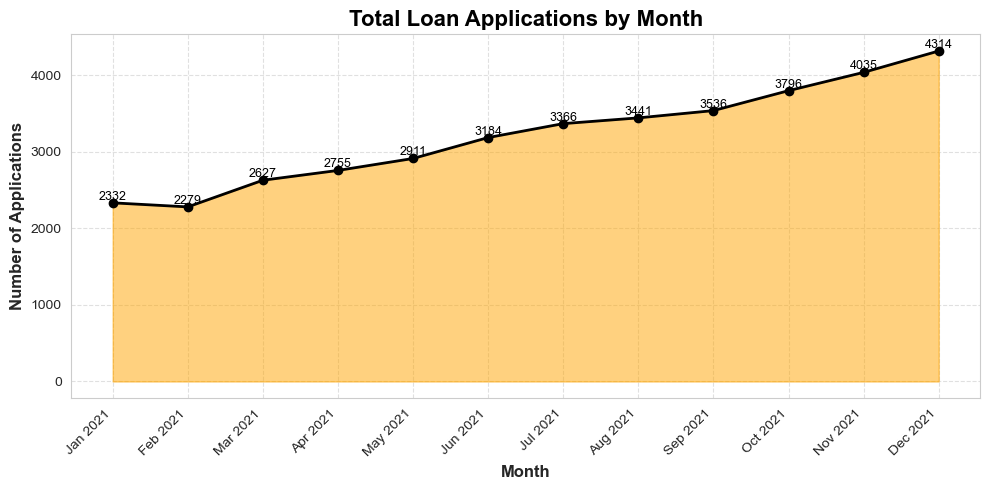

In [52]:
monthly_applications = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby('month_name', sort=False)['id']
      .count()
      .reset_index(name='loan_applications_count')
)

plt.figure(figsize=(10, 5))

plt.fill_between(
    monthly_applications['month_name'], 
    monthly_applications['loan_applications_count'], 
    color='orange', alpha=0.5
)

plt.plot(
    monthly_applications['month_name'], 
    monthly_applications['loan_applications_count'], 
    color='black', linewidth=2, marker='o'
)

for i, row in monthly_applications.iterrows():
    plt.text(
        i, row['loan_applications_count'] + 0.5, 
        f"{row['loan_applications_count']}",
        ha='center', va='bottom', fontsize=9, color='black'
    )

plt.title('Total Loan Applications by Month', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Number of Applications', fontsize=12, fontweight='bold')

plt.xticks(
    ticks=range(len(monthly_applications)), 
    labels=monthly_applications['month_name'], 
    rotation=45, ha='right'
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



## Regional Analysis by State for Total Funded Amount


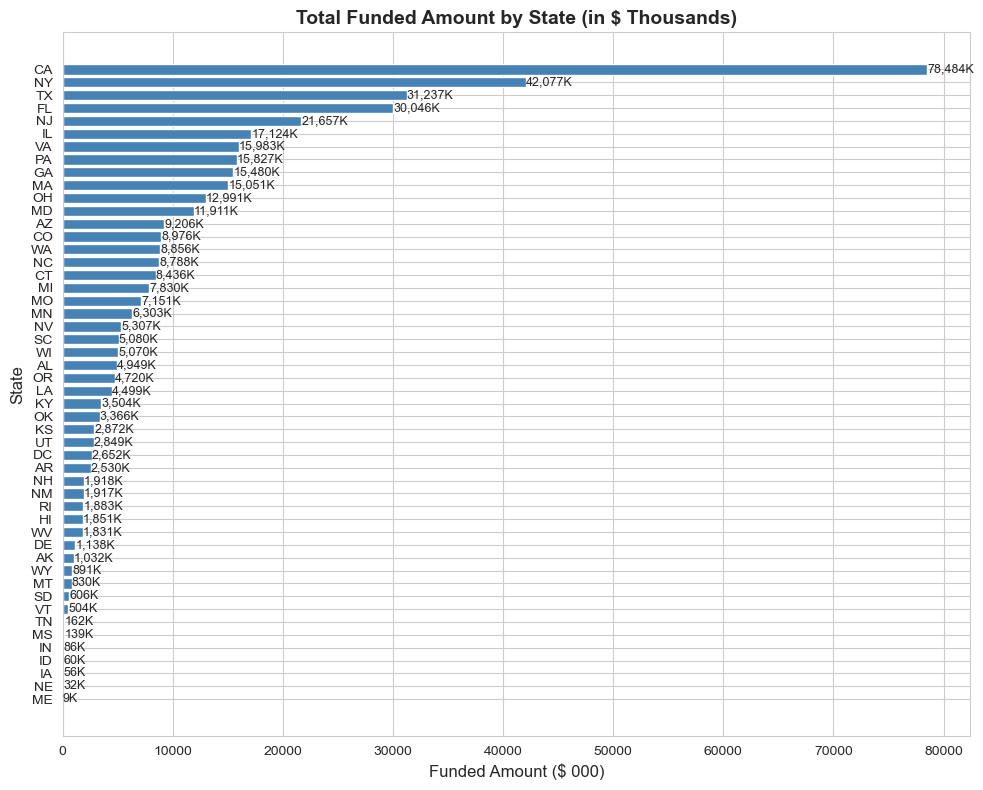

In [53]:
# Aggregate funding by state
state_funding = (
    df.groupby('address_state')['loan_amount']
      .sum()
      .sort_values(ascending=True)
)

# Convert to thousands
state_funding_thousands = state_funding / 1000

# Plot horizontal bar chart
plt.figure(figsize=(10, 8))
bars = plt.barh(
    state_funding_thousands.index, 
    state_funding_thousands.values, 
    color='steelblue'
)

# Add labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 10, 
        bar.get_y() + bar.get_height()/2,
        f"{width:,.0f}K", 
        va="center", fontsize=9
    )

# Titles and labels
plt.title('Total Funded Amount by State (in $ Thousands)', fontsize=14, fontweight='bold')
plt.xlabel('Funded Amount ($ 000)', fontsize=12)
plt.ylabel('State', fontsize=12)

plt.tight_layout()
plt.show()


## Regional Analysis by State for Total Amount Received


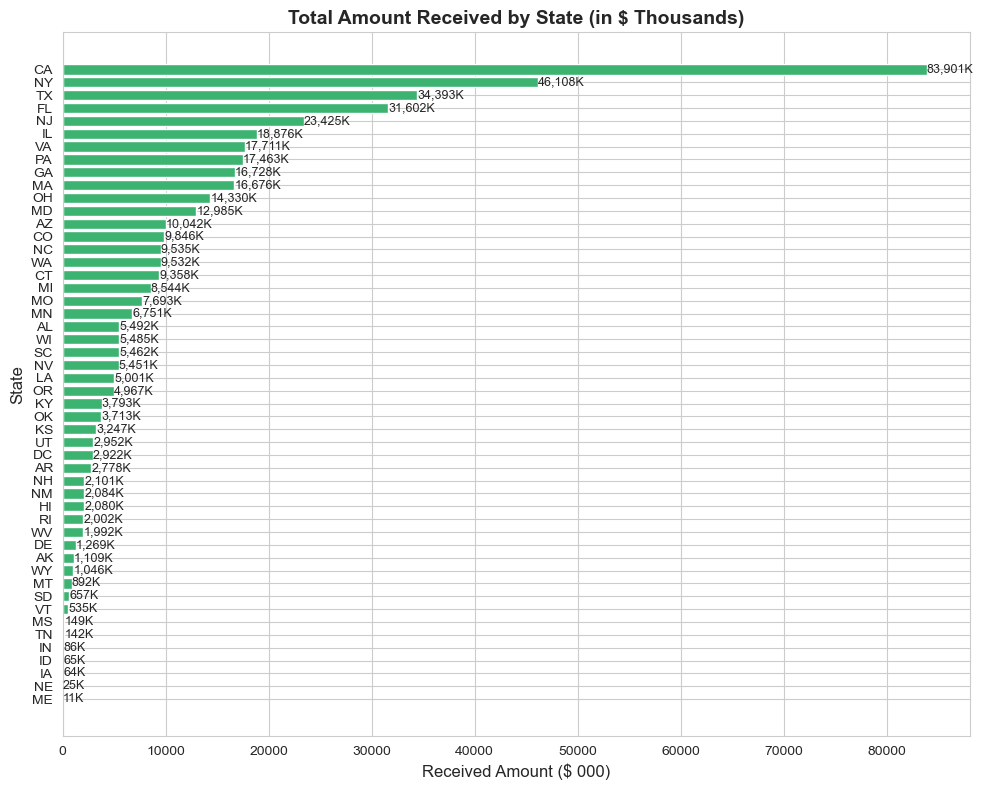

In [54]:
state_received = (
    df.groupby('address_state')['total_payment']
      .sum()
      .sort_values(ascending=True)
)

state_received_thousands = state_received / 1000

plt.figure(figsize=(10, 8))
bars = plt.barh(
    state_received_thousands.index, 
    state_received_thousands.values, 
    color='mediumseagreen'  # green tone
)

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 10, 
        bar.get_y() + bar.get_height()/2,
        f"{width:,.0f}K", 
        va="center", fontsize=9
    )

plt.title('Total Amount Received by State (in $ Thousands)', fontsize=14, fontweight='bold')
plt.xlabel('Received Amount ($ 000)', fontsize=12)
plt.ylabel('State', fontsize=12)

plt.tight_layout()
plt.show()

## Regional Analysis by State for Total loan application


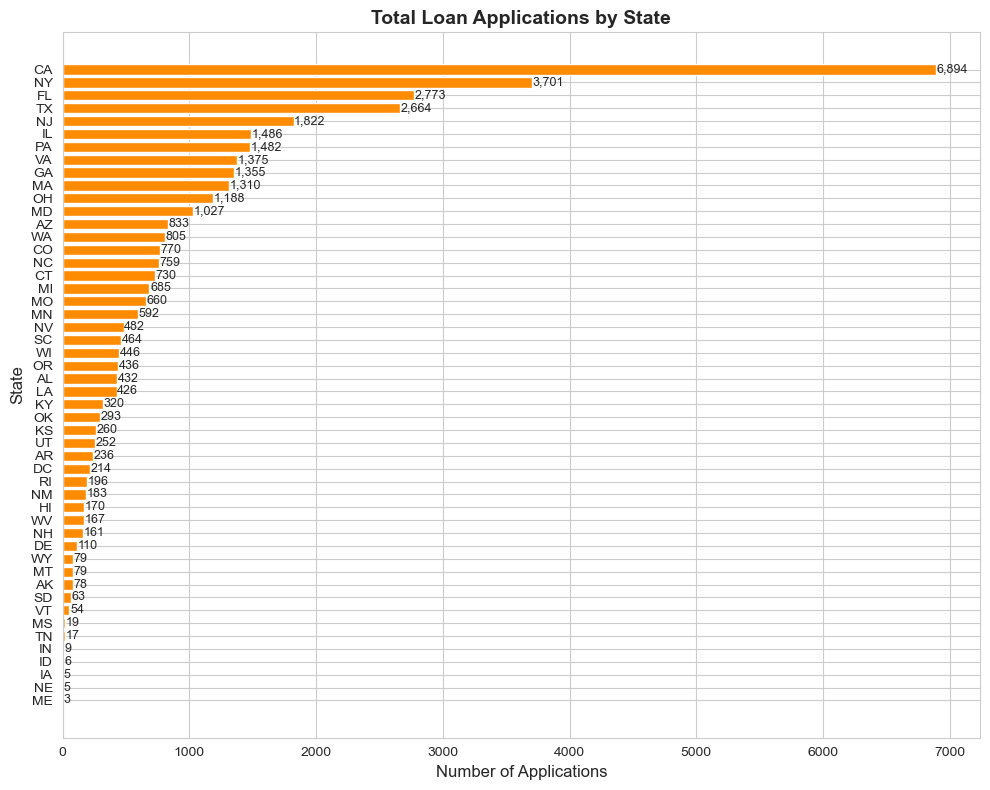

In [55]:
state_applications = (
    df.groupby('address_state')['id']
      .count()
      .sort_values(ascending=True)
)

plt.figure(figsize=(10, 8))
bars = plt.barh(
    state_applications.index, 
    state_applications.values, 
    color='darkorange'  # orange tone
)

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 5, 
        bar.get_y() + bar.get_height()/2,
        f"{width:,}", 
        va="center", fontsize=9
    )

plt.title('Total Loan Applications by State', fontsize=14, fontweight='bold')
plt.xlabel('Number of Applications', fontsize=12)
plt.ylabel('State', fontsize=12)

plt.tight_layout()
plt.show()


## Loan Term Analysis by Total Funded Amount

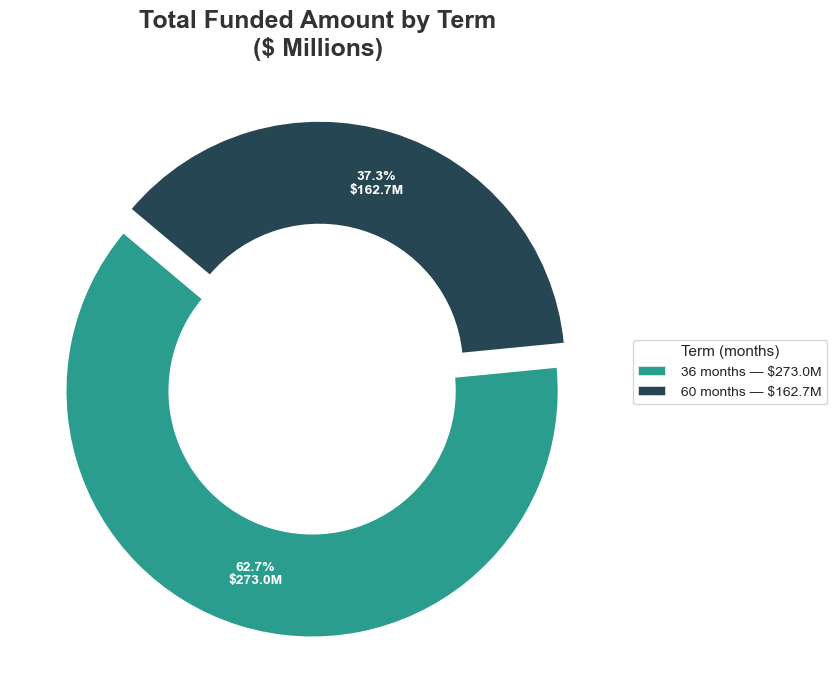

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# prepare & sanitize data
df['loan_amount'] = pd.to_numeric(df['loan_amount'], errors='coerce')
term_funding_millions = (df.groupby('term')['loan_amount'].sum() / 1_000_000).sort_values(ascending=False)
term_funding_millions = term_funding_millions[term_funding_millions > 0]  # drop zero slices if any

labels = term_funding_millions.index.astype(str)
sizes = term_funding_millions.values
total = sizes.sum()

# explode the largest slice slightly
explode = [0.08 if i == 0 else 0.02 for i in range(len(sizes))]

# dynamic color palette (fallback to a nice custom palette)
base_colors = ['#2a9d8f', '#264653', '#e9c46a', '#f4a261', '#e76f51', '#8ab17d']
if len(sizes) <= len(base_colors):
    colors = base_colors[:len(sizes)]
else:
    # fallback to a continuous colormap
    cmap = plt.get_cmap('tab20')
    colors = [cmap(i) for i in np.linspace(0, 1, len(sizes))]

def autopct_format(pct):
    absolute = pct / 100.0 * total
    return f"{pct:.1f}%\n${absolute:,.1f}M"

fig, ax = plt.subplots(figsize=(9, 7), facecolor='white')

wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,                # labels in legend instead (keeps wedges clean)
    autopct=autopct_format,
    startangle=140,
    explode=explode,
    colors=colors,
    wedgeprops=dict(width=0.42, edgecolor='white', linewidth=1.1),
    pctdistance=0.78,          # place autopct inside wedge nearer center
    textprops=dict(fontsize=11)
)

# center circle (donut hole)
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
ax.add_artist(centre_circle)

# style auto-text (percent/amount)
for txt in autotexts:
    txt.set_color('white')
    txt.set_fontweight('bold')
    txt.set_fontsize(10)

# title
ax.set_title("Total Funded Amount by Term\n($ Millions)", fontsize=18, fontweight='bold', color='#333333')

# legend to the right
ax.legend(
    wedges,
    [f"{lab} — ${val:,.1f}M" for lab, val in zip(labels, sizes)],
    title="Term (months)",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.35, 1),
    fontsize=10,
    title_fontsize=11
)

# add a subtle shadow / frame
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()


## Loan Term Analysis by Total Amount Received

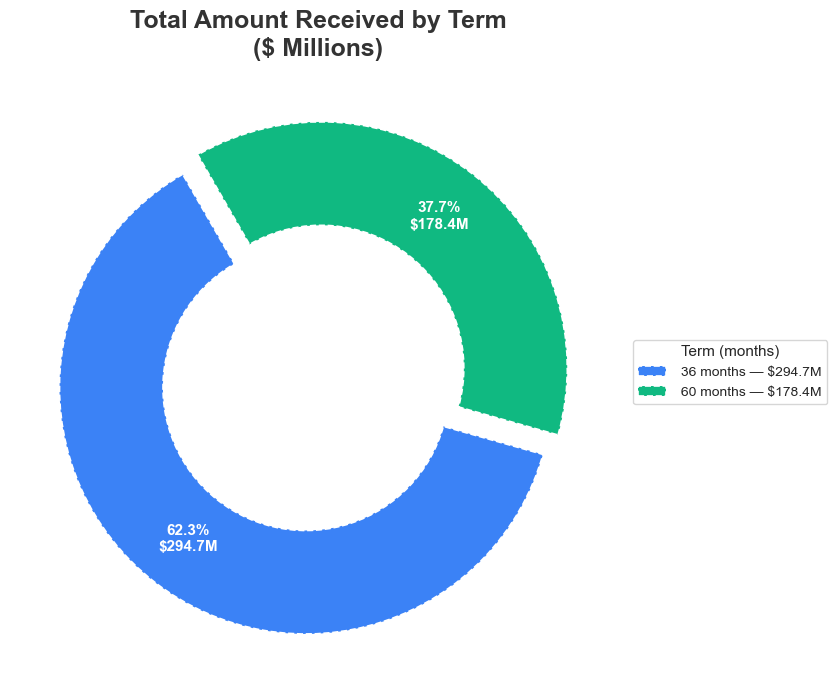

In [60]:
# --- Total Amount Received by Term ---
received_millions = (df.groupby('term')['total_payment'].sum() / 1_000_000).sort_values(ascending=False)
received_millions = received_millions[received_millions > 0]

labels = received_millions.index.astype(str)
sizes = received_millions.values
total = sizes.sum()

explode = [0.08 if i == 0 else 0.02 for i in range(len(sizes))]

# Blue/green gradient
colors = ['#3b82f6', '#10b981', '#0ea5e9', '#14b8a6', '#06b6d4']

def autopct_format(pct):
    absolute = pct / 100.0 * total
    return f"{pct:.1f}%\n${absolute:,.1f}M"

fig, ax = plt.subplots(figsize=(9, 7), facecolor='white')

wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,
    autopct=autopct_format,
    startangle=120,
    explode=explode,
    colors=colors,
    wedgeprops=dict(width=0.42, edgecolor='white', linewidth=1.2, linestyle='--'),
    pctdistance=0.78,
    textprops=dict(fontsize=11)
)

centre_circle = plt.Circle((0, 0), 0.55, fc='white')
ax.add_artist(centre_circle)

for txt in autotexts:
    txt.set_color('white')
    txt.set_fontweight('bold')

ax.set_title("Total Amount Received by Term\n($ Millions)", fontsize=18, fontweight='bold', color='#333333')

ax.legend(
    wedges,
    [f"{lab} — ${val:,.1f}M" for lab, val in zip(labels, sizes)],
    title="Term (months)",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.35, 1),
    fontsize=10,
    title_fontsize=11
)

plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()


## Loan Term Analysis by Total Loan Application

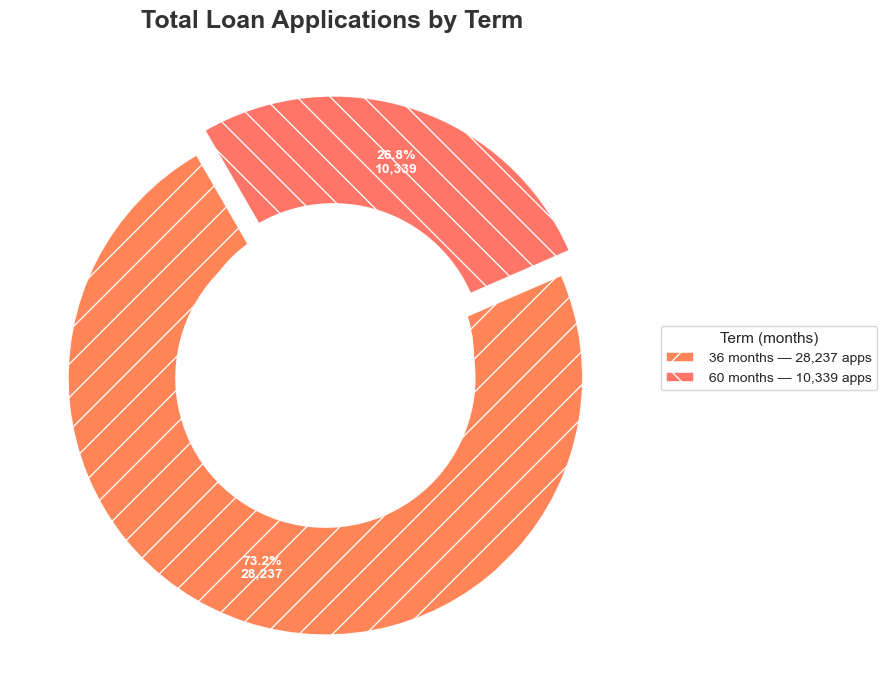

In [65]:
# --- Total Loan Applications by Term (Donut with patterns) ---
applications_count = df.groupby('term')['id'].count().sort_values(ascending=False)
applications_count = applications_count[applications_count > 0]

labels_app = applications_count.index.astype(str)
sizes_app = applications_count.values
total_apps = sizes_app.sum()

explode_app = [0.08 if i == 0 else 0.02 for i in range(len(sizes_app))]

# Warm palette for applications
app_colors = ['#ff7f50', '#ff6f61', '#ff9f1c', '#ffbf69', '#ff9966', '#ff5c33']
if len(sizes_app) > len(app_colors):
    cmap = plt.get_cmap('tab20')
    app_colors = [cmap(i) for i in np.linspace(0, 1, len(sizes_app))]

def autopct_apps(pct):
    absolute = int(round(pct / 100.0 * total_apps))
    return f"{pct:.1f}%\n{absolute:,}"

fig, ax = plt.subplots(figsize=(9, 7), facecolor='white')

wedges_app, texts_app, autotexts_app = ax.pie(
    sizes_app,
    labels=None,
    autopct=autopct_apps,
    startangle=120,
    explode=explode_app,
    colors=app_colors,
    wedgeprops=dict(width=0.42, edgecolor='white', linewidth=1.2),
    pctdistance=0.78,
    textprops=dict(fontsize=11)
)

# Add hatch patterns to wedges for extra distinction
hatch_patterns = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']
for i, w in enumerate(wedges_app):
    w.set_hatch(hatch_patterns[i % len(hatch_patterns)])
    w.set_alpha(0.95)

# center circle (donut hole)
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
ax.add_artist(centre_circle)

# style auto-text (percent + absolute count)
for txt in autotexts_app:
    txt.set_color('white')
    txt.set_fontweight('bold')
    txt.set_fontsize(10)

ax.set_title("Total Loan Applications by Term", fontsize=18, fontweight='bold', color='#333333')

# legend to the right with counts
ax.legend(
    wedges_app,
    [f"{lab} — {val:,} apps" for lab, val in zip(labels_app, sizes_app)],
    title="Term (months)",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.35, 1),
    fontsize=10,
    title_fontsize=11
)

plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()


## Loan Term Analysis by Total (Amount Received and Loan Application)

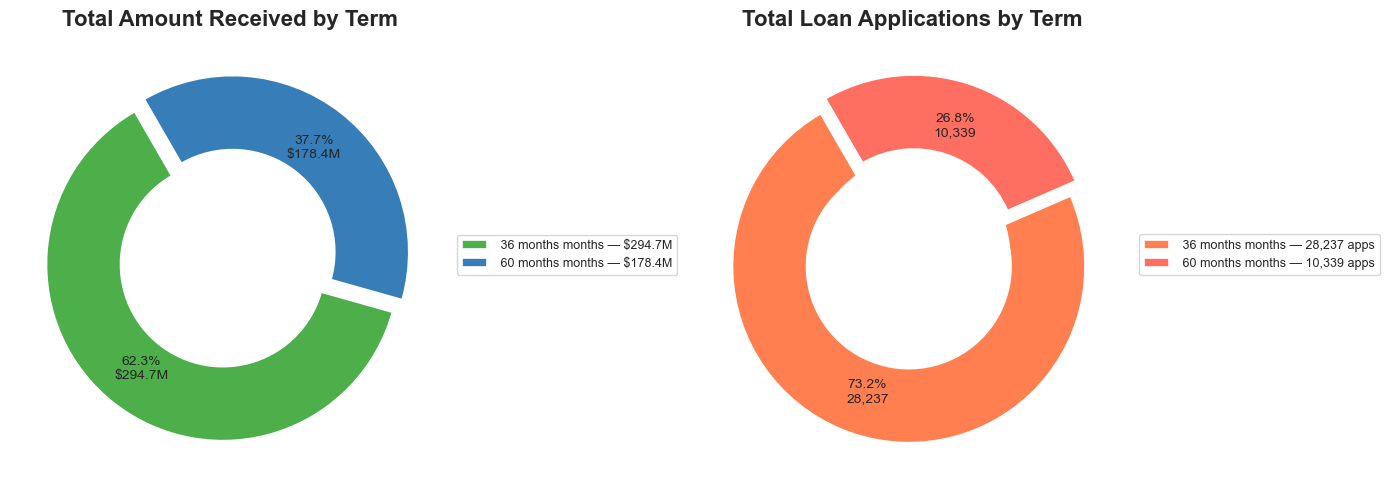

In [67]:
# --- Total Amount Received by Term ---
received_millions = df.groupby('term')['total_payment'].sum() / 1_000_000
received_millions = received_millions[received_millions > 0]

labels_rec = received_millions.index.astype(str)
sizes_rec = received_millions.values
total_rec = sizes_rec.sum()

explode_rec = [0.07 if i == 0 else 0.02 for i in range(len(sizes_rec))]
rec_colors = ['#4daf4a', '#377eb8', '#984ea3', '#ff7f00']

def autopct_rec(pct):
    value = pct * total_rec / 100.0
    return f"{pct:.1f}%\n${value:.1f}M"

# --- Total Loan Applications by Term ---
applications_count = df.groupby('term')['id'].count()
applications_count = applications_count[applications_count > 0]

labels_app = applications_count.index.astype(str)
sizes_app = applications_count.values
total_apps = sizes_app.sum()

explode_app = [0.07 if i == 0 else 0.02 for i in range(len(sizes_app))]
app_colors = ['#ff7f50', '#ff6f61', '#ff9f1c', '#ffbf69']

def autopct_app(pct):
    absolute = int(round(pct / 100.0 * total_apps))
    return f"{pct:.1f}%\n{absolute:,}"

# --- Plot Side by Side ---
fig, axes = plt.subplots(1, 2, figsize=(14, 7), facecolor='white')

# ----- Left: Total Received -----
wedges_rec, texts_rec, autotexts_rec = axes[0].pie(
    sizes_rec,
    labels=None,
    autopct=autopct_rec,
    startangle=120,
    explode=explode_rec,
    colors=rec_colors,
    wedgeprops=dict(width=0.42, edgecolor='white', linewidth=1.2),
    pctdistance=0.75,
    textprops=dict(fontsize=10)
)
centre_circle1 = plt.Circle((0, 0), 0.55, fc='white')
axes[0].add_artist(centre_circle1)
axes[0].set_title("Total Amount Received by Term", fontsize=16, fontweight='bold')
axes[0].legend(
    wedges_rec,
    [f"{lab} months — ${val:.1f}M" for lab, val in zip(labels_rec, sizes_rec)],
    loc="center left",
    bbox_to_anchor=(1, 0, 0.8, 1),
    fontsize=9,
)

# ----- Right: Total Loan Applications -----
wedges_app, texts_app, autotexts_app = axes[1].pie(
    sizes_app,
    labels=None,
    autopct=autopct_app,
    startangle=120,
    explode=explode_app,
    colors=app_colors,
    wedgeprops=dict(width=0.42, edgecolor='white', linewidth=1.2),
    pctdistance=0.75,
    textprops=dict(fontsize=10)
)
centre_circle2 = plt.Circle((0, 0), 0.55, fc='white')
axes[1].add_artist(centre_circle2)
axes[1].set_title("Total Loan Applications by Term", fontsize=16, fontweight='bold')
axes[1].legend(
    wedges_app,
    [f"{lab} months — {val:,} apps" for lab, val in zip(labels_app, sizes_app)],
    loc="center left",
    bbox_to_anchor=(1, 0, 0.8, 1),
    fontsize=9,
)

plt.tight_layout()

# ---- Save High-Res PNG ----
fig.savefig("loan_terms_comparison.png", dpi=300, bbox_inches='tight')

plt.show()


## Employee Length by Total Funded Amount

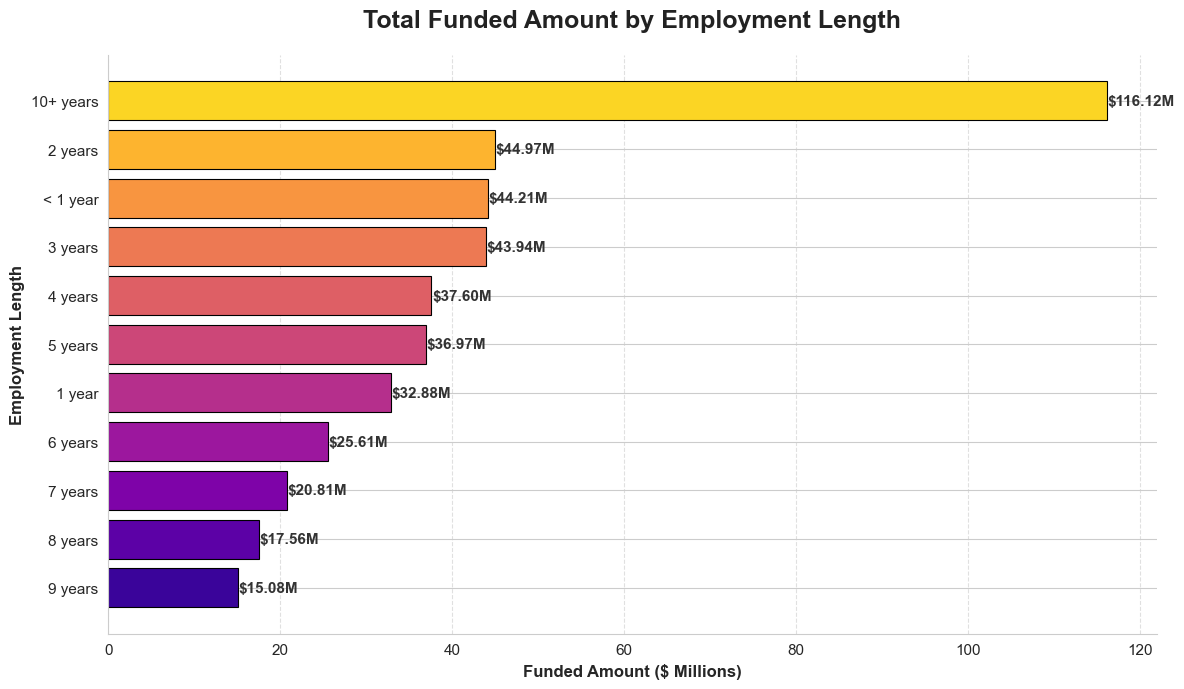

In [68]:
# Group by employment length, convert to millions for clean labels
emp_funding = df.groupby('emp_length')['loan_amount'].sum().sort_values() / 1_000_000  

# Style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Gradient-style purple palette
colors = sns.color_palette("plasma", len(emp_funding))

# Horizontal bar chart
bars = plt.barh(emp_funding.index, emp_funding, color=colors, edgecolor="black", linewidth=0.8)

# Annotate each bar with funding amount
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, 
             bar.get_y() + bar.get_height() / 2, 
             f"${width:,.2f}M",   # formatted to millions with 2 decimals
             va='center', 
             fontsize=11, 
             fontweight="bold", 
             color="#333333")

# Titles and labels
plt.title("Total Funded Amount by Employment Length", fontsize=18, fontweight="bold", color="#222222", pad=20)
plt.xlabel("Funded Amount ($ Millions)", fontsize=12, fontweight="bold")
plt.ylabel("Employment Length", fontsize=12, fontweight="bold")

# Grid + style tweaks
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Remove top/right spines for clean look
sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()


## Employee Length by Total Amount Received and Loan Application

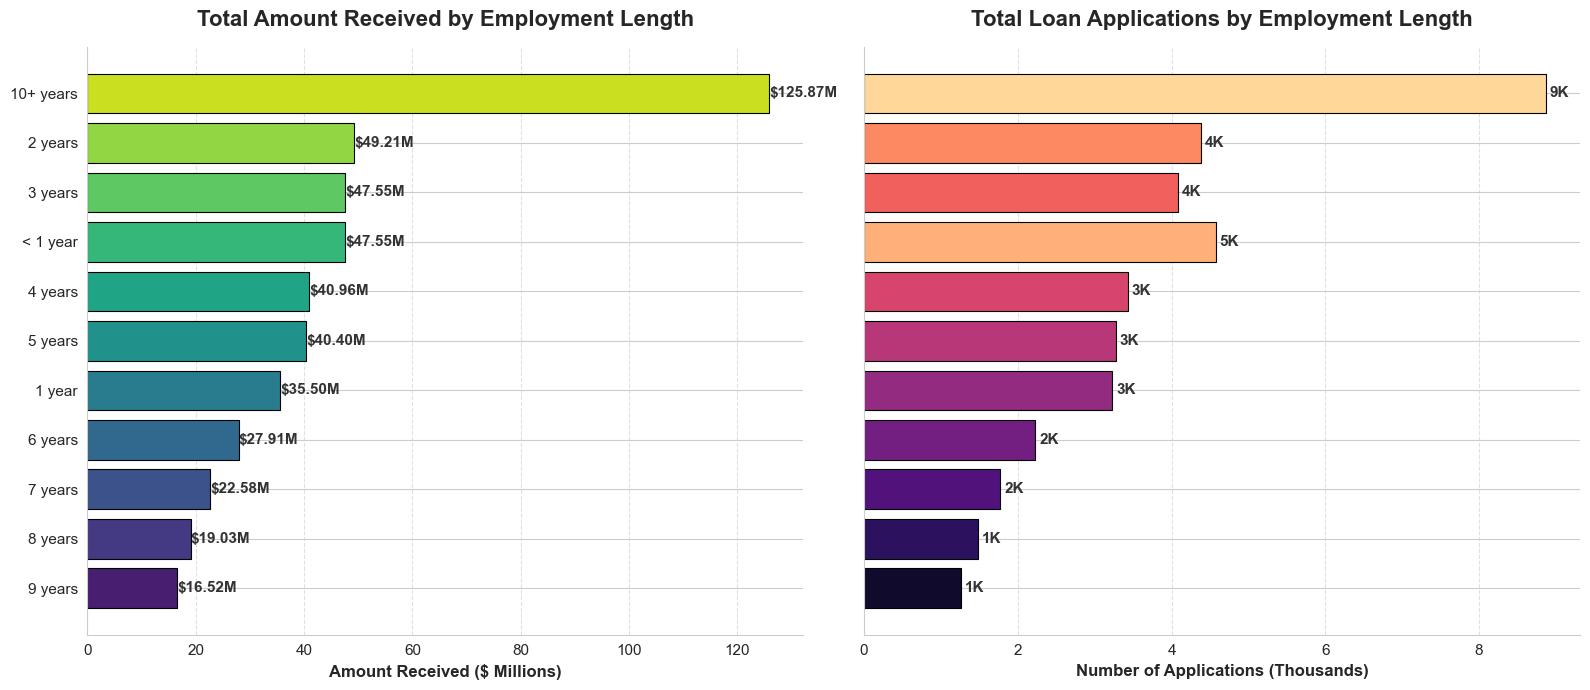

In [71]:
emp_received = df.groupby('emp_length')['total_payment'].sum().sort_values() / 1_000_000
emp_applications = df.groupby('emp_length')['id'].count().sort_values() / 1_000   # count of loan apps in thousands


sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=True)

# Color palettes
colors1 = sns.color_palette("viridis", len(emp_received))
colors2 = sns.color_palette("magma", len(emp_applications))

# ======================
# CHART 1 - Amount Received
# ======================
bars1 = axes[0].barh(emp_received.index, emp_received, color=colors1, edgecolor="black", linewidth=0.8)

for bar in bars1:
    width = bar.get_width()
    axes[0].text(width + 0.05,
                 bar.get_y() + bar.get_height()/2,
                 f"${width:,.2f}M",
                 va='center', fontsize=11, fontweight="bold", color="#333")

axes[0].set_title("Total Amount Received by Employment Length", fontsize=16, fontweight="bold", pad=15)
axes[0].set_xlabel("Amount Received ($ Millions)", fontsize=12, fontweight="bold")
axes[0].grid(axis='x', linestyle='--', alpha=0.6)

# ======================
# CHART 2 - Loan Applications
# ======================
bars2 = axes[1].barh(emp_applications.index, emp_applications, color=colors2, edgecolor="black", linewidth=0.8)

for bar in bars2:
    width = bar.get_width()
    axes[1].text(width + 0.05,
                 bar.get_y() + bar.get_height()/2,
                 f"{width:,.0f}K",
                 va='center', fontsize=11, fontweight="bold", color="#333")

axes[1].set_title("Total Loan Applications by Employment Length", fontsize=16, fontweight="bold", pad=15)
axes[1].set_xlabel("Number of Applications (Thousands)", fontsize=12, fontweight="bold")
axes[1].grid(axis='x', linestyle='--', alpha=0.6)

for ax in axes:
    ax.tick_params(axis='y', labelsize=11)
    ax.tick_params(axis='x', labelsize=11)
    sns.despine(ax=ax, left=False, bottom=False)

plt.tight_layout()
plt.show()


## Loan Purpose by Total Funded Amount, Amount Received and Loan Application

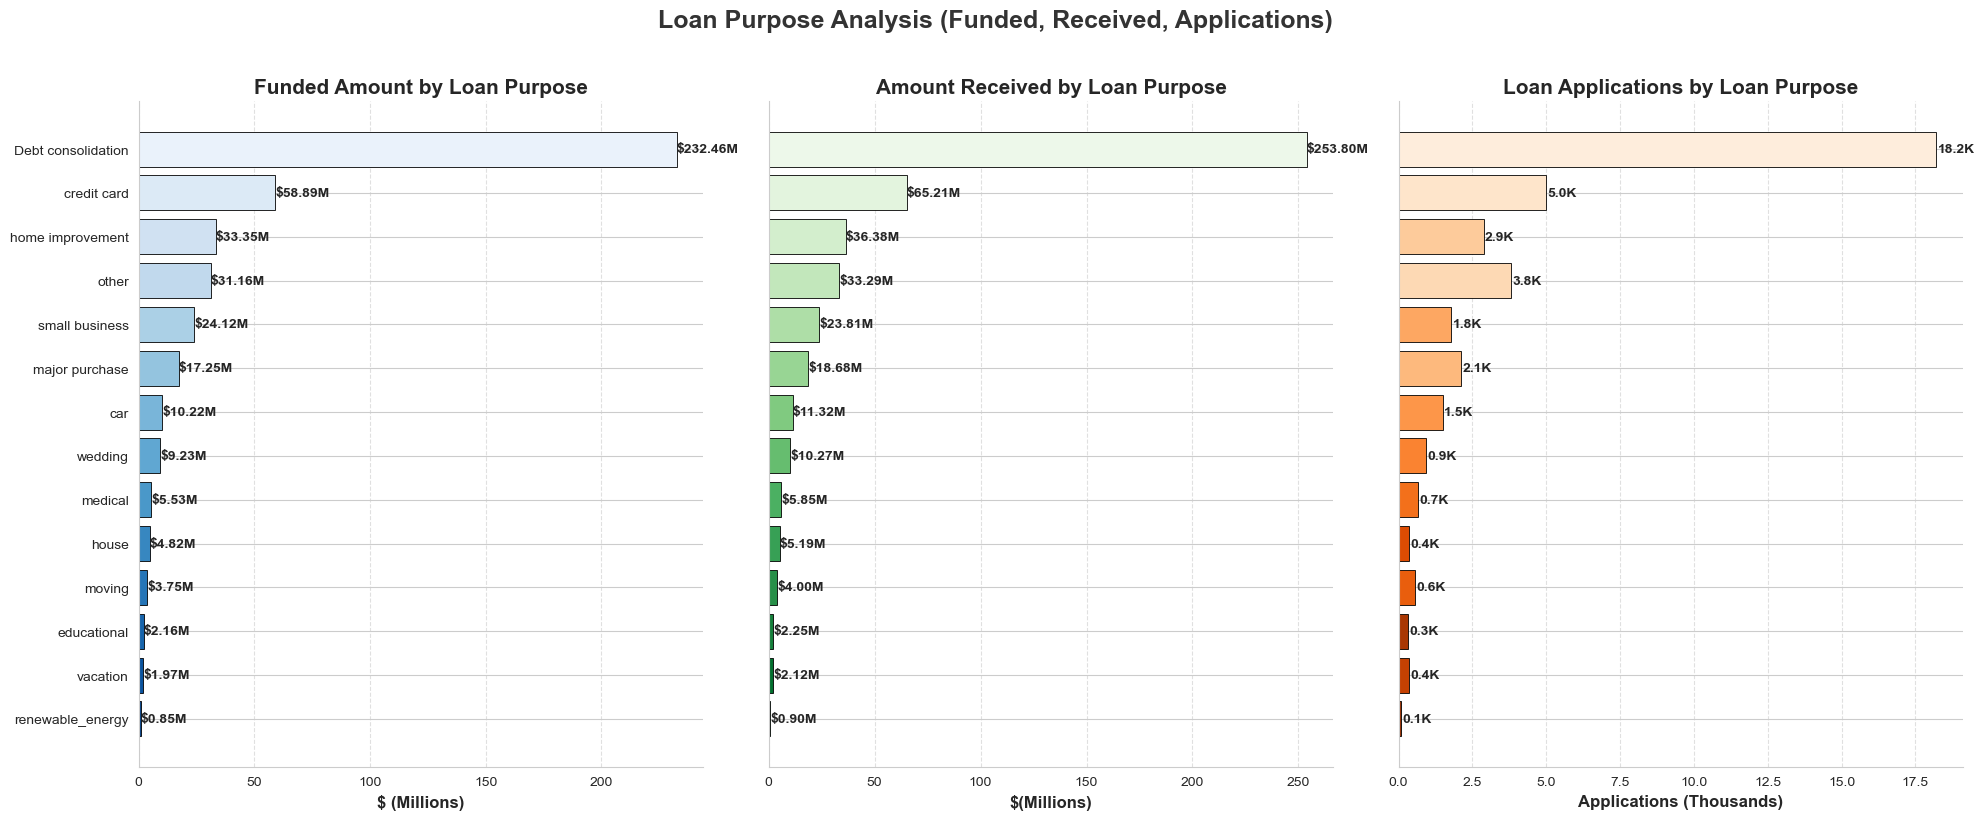

In [72]:
purpose_funding_millions = df.groupby('purpose')['loan_amount'].sum().sort_values() / 1_000_000
purpose_received_millions = df.groupby('purpose')['total_payment'].sum().sort_values() / 1_000_000
purpose_applications_thousands = df.groupby('purpose')['id'].count().sort_values() / 1000

sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)

palettes = [
    sns.color_palette("Blues_r", len(purpose_funding_millions)),
    sns.color_palette("Greens_r", len(purpose_received_millions)),
    sns.color_palette("Oranges_r", len(purpose_applications_thousands))
]

# ======================
# CHART 1 - Funded Amount
# ======================
bars1 = axes[0].barh(purpose_funding_millions.index, purpose_funding_millions.values, 
                     color=palettes[0], edgecolor="black", linewidth=0.6)

for bar in bars1:
    width = bar.get_width()
    axes[0].text(width + 0.1, bar.get_y() + bar.get_height()/2,
                 f"${width:,.2f}M", va='center', fontsize=10, fontweight="bold")

axes[0].set_title("Funded Amount by Loan Purpose", fontsize=15, fontweight="bold")
axes[0].set_xlabel("$ (Millions)", fontsize=12, fontweight="bold")
axes[0].grid(axis='x', linestyle='--', alpha=0.6)

# ======================
# CHART 2 - Amount Received
# ======================
bars2 = axes[1].barh(purpose_received_millions.index, purpose_received_millions.values, 
                     color=palettes[1], edgecolor="black", linewidth=0.6)

for bar in bars2:
    width = bar.get_width()
    axes[1].text(width + 0.1, bar.get_y() + bar.get_height()/2,
                 f"${width:,.2f}M", va='center', fontsize=10, fontweight="bold")

axes[1].set_title("Amount Received by Loan Purpose", fontsize=15, fontweight="bold")
axes[1].set_xlabel("$(Millions)", fontsize=12, fontweight="bold")
axes[1].grid(axis='x', linestyle='--', alpha=0.6)

# ======================
# CHART 3 - Loan Applications
# ======================
bars3 = axes[2].barh(purpose_applications_thousands.index, purpose_applications_thousands.values, 
                     color=palettes[2], edgecolor="black", linewidth=0.6)

for bar in bars3:
    width = bar.get_width()
    axes[2].text(width + 0.05, bar.get_y() + bar.get_height()/2,
                 f"{width:,.1f}K", va='center', fontsize=10, fontweight="bold")

axes[2].set_title("Loan Applications by Loan Purpose", fontsize=15, fontweight="bold")
axes[2].set_xlabel("Applications (Thousands)", fontsize=12, fontweight="bold")
axes[2].grid(axis='x', linestyle='--', alpha=0.6)

for ax in axes:
    ax.tick_params(axis='y', labelsize=10)
    ax.tick_params(axis='x', labelsize=10)
    sns.despine(ax=ax, left=False, bottom=False)

plt.suptitle("Loan Purpose Analysis (Funded, Received, Applications)", 
             fontsize=18, fontweight="bold", y=1.02, color="#333333")

plt.tight_layout()
plt.show()


## Home Ownership by Total Funded Amount

In [74]:
fig = px.treemap(
    home_funding,
    path=['home_ownership'],
    values='loan_amount_millions',
    color='loan_amount_millions',
    color_continuous_scale='Viridis',  # bolder, modern color scale
    title='💡 Total Funded Amount by Home Ownership ($ Millions)'
)

fig.update_traces(
    texttemplate="<b>%{label}</b><br>💵 %{value:.2f}M",
    textposition="middle center"
)

fig.update_layout(
    title_font=dict(size=22, family="Arial Black", color="#333"),
    margin=dict(t=60, l=25, r=25, b=25)
)

fig.show()


In [79]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# 1. Prepare aggregated data
home_received = df.groupby('home_ownership')['total_payment'].sum().reset_index()
home_received['received_amount_millions'] = home_received['total_payment'] / 1_000_000

home_applications = df.groupby('home_ownership')['id'].count().reset_index()
home_applications.rename(columns={'id': 'applications'}, inplace=True)

# 2. Create subplot layout (2 columns)
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=[
        "💵 Received Amount (in $M)",
        "📑 Loan Applications"
    ],
    specs=[[{"type": "domain"}, {"type": "domain"}]]
)

# 3. Add treemaps
fig.add_trace(go.Treemap(
    labels=home_received['home_ownership'],
    parents=[""]*len(home_received),
    values=home_received['received_amount_millions'],
    marker=dict(colors=home_received['received_amount_millions'], colorscale="Greens"),
    texttemplate="<b>%{label}</b><br>$%{value:.2f}M"
), row=1, col=1)

fig.add_trace(go.Treemap(
    labels=home_applications['home_ownership'],
    parents=[""]*len(home_applications),
    values=home_applications['applications'],
    marker=dict(colors=home_applications['applications'], colorscale="Oranges"),
    texttemplate="<b>%{label}</b><br>%{value}"
), row=1, col=2)

# 4. Layout polish
fig.update_layout(
    title="🏠 Loan Portfolio by Home Ownership",
    title_font=dict(size=22, family="Arial Black", color="#333"),
    margin=dict(t=80, l=20, r=20, b=20),
    height=500, width=900
)

# 5. Show and save final dashboard
fig.show()
fig.write_image("home_ownership_dashboard_received_vs_applications.png", scale=3)  # 🔥 High-res export


## 📊 Loan Portfolio Summary

Here’s the high-level overview of the loan dataset after our analysis:

- **Total Loan Applications:** **38,576**  
- **Total Funded Amount:** **$435.76M**  
- **Total Amount Received:** **$435.76M**  
- **Average Interest Rate:** **12.05%**  
- **Average DTI (Debt-to-Income):** **13.33%**  

---

### ✅ Good Loans
- **Applications:** **33,243**  
- **Funded Amount:** **$370.22M**  
- **Total Amount Received:** **$435.79M**  
- **% of Total Applications:** **86.18%**  

### ❌ Bad Loans
- **Applications:** **5,333**  
- **Funded Amount:** **$65.53M**  
- **Total Amount Received:** **$37.28M**  
- **% of Total Applications:** **13.82%**  

---

## 🔑 Key Insights
- The loan portfolio is **dominated by Good Loans (86%)**, with strong repayment performance.  
- **Bad Loans make up only 13.8%**, but they carry a noticeable risk due to lower repayment levels ($37.28M received vs $65.53M funded).  
- Average **interest rate (12.05%)** and **DTI (13.33%)** indicate generally moderate credit risk.  
- Overall, the dataset reflects a **healthy lending portfolio** with consistent repayments.

